<a href="https://colab.research.google.com/github/Eduardo-Coyto/Curso-ML-UTEC-4Geeks/blob/Descriptive-Statistics/DataSet%20Crimes_4GKS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Read the dataset
url = 'https://datos.cdmx.gob.mx/dataset/12d22477-bcf1-49ee-92aa-16a0d0a5817c/' + \
      'resource/3f308147-b1fc-49a9-92b7-e74f3f79aa9c/download/' + \
      'carpetas-de-investigacion-pgj-cdmx.csv'
df = pd.read_csv(url)

In [3]:
# 2. View the basic data structure and dimensions 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808871 entries, 0 to 808870
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    808871 non-null  int64  
 1   ao_hechos             808673 non-null  float64
 2   mes_hechos            808673 non-null  object 
 3   fecha_hechos          808673 non-null  object 
 4   delito                808871 non-null  object 
 5   categoria_delito      808871 non-null  object 
 6   fiscalia              808871 non-null  object 
 7   agencia               808871 non-null  object 
 8   unidad_investigacion  808646 non-null  object 
 9   colonia_hechos        776781 non-null  object 
 10  alcaldia_hechos       807860 non-null  object 
 11  fecha_inicio          808871 non-null  object 
 12  mes_inicio            808871 non-null  object 
 13  ao_inicio             808871 non-null  int64  
 14  calle_hechos          806467 non-null  object 
 15  

In [5]:
# 3. Display some observations
df.sample(2)

,id,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
679756,679756,2015.0,Diciembre,2015-12-23 12:00:00,TENTATIVA DE EXTORSION,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-1,UI-1SD,EL ROSARIO,AZCAPOTZALCO,2016-02-26 01:49:27,Febrero,2016,EL ROSARIO,NaN,-99.199179,19.500456,"19.5004559998,-99.199179"
248637,248637,2016.0,Julio,2016-07-21 19:00:00,DENUNCIA DE HECHOS,HECHO NO DELICTIVO,INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS SEXU...,FDS-3,FDS-3-01,NaN,VENUSTIANO CARRANZA,2016-08-11 11:50:46,Agosto,2016,SIN PRECISAR,NaN,NaN,NaN,NaN


In [11]:
# We want only the mayors from Ciudad de Mexico
df['alcaldia_hechos'].nunique() #nunique() me da la cantidad de valores que tienen esa lista

485

In [18]:
len(df['alcaldia_hechos'].value_counts())

485

In [3]:
df = df[df['alcaldia_hechos'].isin (['ALVARO OBREGON','AZCAPOTZALCO','BENITO JUAREZ','COYOACAN','CUAJIMALPA DE MORELOS','CUAUHTEMOC','GUSTAVO A MADERO','IZTACALCO','IZTAPALAPA','LA MAGDALENA CONTRERAS','MIGUEL HIDALGO','MILPA ALTA','TLAHUAC','TLALPAN','VENUSTIANO CARRANZA','XOCHIMILCO'])]
df.head()

,id,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
0,0,2016.0,Enero,2016-01-05 17:00:00,LESIONES CULPOSAS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-6,UI-1CD,GRANJAS MODERNAS,GUSTAVO A MADERO,2016-01-05 18:35:37,Enero,2016,SAN JUAN DE ARAGON,CALLE ANZAR,-99.103527,19.481076,"19.4810759998,-99.103527"
2,2,2017.0,Noviembre,2017-11-01 16:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN IZTACALCO,IZC-2,UI-1SD,GABRIEL RAMOS MILLÁN SECCIÓN TLACOTAL,IZTACALCO,2017-11-01 16:56:04,Noviembre,2017,SUR 117,ORIENTE 100A,-99.106072,19.395398,"19.3953976727,-99.1060723829"
3,3,2015.0,Diciembre,2015-12-30 20:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-1CD,CONSEJO AGRARISTA MEXICANO,IZTAPALAPA,2016-01-05 21:12:42,Enero,2016,CUARTA CERRADA DE FRESNO,ENCINO (SIN REGISTRO DEL SAP),-99.055887,19.322458,"19.3224579998,-99.055887"
4,4,2018.0,Mayo,2018-05-16 16:00:00,ROBO A REPARTIDOR CON VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-9,UI-2SD,DESARROLLO URBANO QUETZALCOATL,IZTAPALAPA,2018-05-22 10:44:45,Mayo,2018,TARASCO,ZAPOTECO,-99.042786,19.319141,"19.3191405147,-99.0427862526"
5,5,2018.0,Mayo,2018-05-21 20:40:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-2,UI-2SD,INFONAVIT IZTACALCO,IZTACALCO,2018-05-22 10:52:18,Mayo,2018,FRANCISCO DEL PASO Y TRONCOSO,ISLA,-99.111563,19.386594,"19.3865939284,-99.1115626682"


In [4]:
df.alcaldia_hechos.nunique()

16

In [ ]:
df.info()

In [5]:
# Convert the values to the right type
df['fecha_hechos'] = df['fecha_hechos'].astype('datetime64')
df['fecha_inicio'] = df['fecha_inicio'].astype('datetime64')
df['mes_hechos'] = pd.Categorical(df['mes_hechos'])
df['delito'] = pd.Categorical(df['delito'])
df['categoria_delito'] = pd.Categorical(df['categoria_delito']) 
df['unidad_investigacion'] = pd.Categorical(df['unidad_investigacion']) 

In [33]:
# Summarise the data, including dates
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800207 entries, 0 to 808870
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    800207 non-null  int64         
 1   ao_hechos             800021 non-null  float64       
 2   mes_hechos            800021 non-null  category      
 3   fecha_hechos          800021 non-null  datetime64[ns]
 4   delito                800207 non-null  category      
 5   categoria_delito      800207 non-null  category      
 6   fiscalia              800207 non-null  object        
 7   agencia               800207 non-null  object        
 8   unidad_investigacion  799985 non-null  category      
 9   colonia_hechos        776763 non-null  object        
 10  alcaldia_hechos       800207 non-null  object        
 11  fecha_inicio          800207 non-null  datetime64[ns]
 12  mes_inicio            800207 non-null  object        
 13 

In [6]:
df.describe(datetime_is_numeric= True)

,id,ao_hechos,fecha_hechos,fecha_inicio,ao_inicio,longitud,latitud
count,800207.000000,800021.000000,800021,800207,800207.000000,777531.000000,777531.000000
mean,404440.724969,2017.233964,2017-09-15 06:18:33.451072768,2017-11-08 17:23:31.065400576,2017.385711,-99.137482,19.388497
min,0.000000,1906.000000,1906-06-02 19:00:00,2016-01-01 01:35:06,2016.000000,-99.342765,9.486549
25%,202177.500000,2016.000000,2016-11-28 10:30:00,2017-01-09 17:54:14,2017.000000,-99.174906,19.342264
50%,404476.000000,2017.000000,2017-10-27 11:30:00,2017-11-27 12:11:57,2017.000000,-99.142680,19.391685
75%,606686.500000,2018.000000,2018-08-25 13:00:00,2018-09-19 16:27:08.500000,2018.000000,-99.101421,19.437588
max,808870.000000,2019.000000,2019-06-30 23:00:00,2019-06-30 23:56:29,2019.000000,-98.946873,19.582490
std,233527.398708,1.412214,NaN,NaN,1.020460,0.058753,0.069692


In [7]:
# How many crimes are recorded in this dataset? In which period?
print(f"There are {len(df)} crimes, from {df['fecha_inicio'].min()} to {df['fecha_inicio'].max()}")

There are 800207 crimes, from 2016-01-01 01:35:06 to 2019-06-30 23:56:29


In [8]:
# How many crimes were recorded by year?
len(df['delito'].value_counts())

273

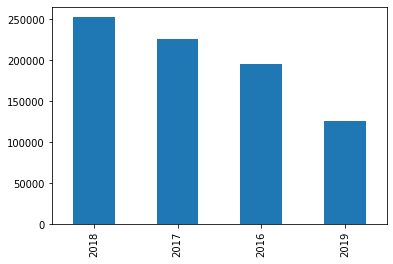

In [9]:
df['ao_inicio'].value_counts().plot(kind='bar')

In [10]:
df.set_index('fecha_inicio', inplace= True)

In [11]:
df_count = df.groupby(df.index.year).size().reset_index(name='obs')

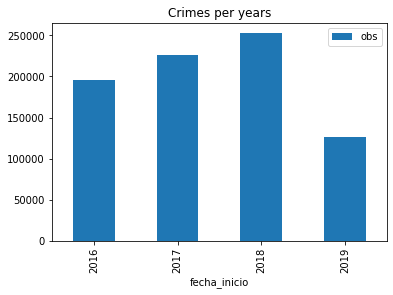

In [14]:
df_count.plot.bar(title='Crimes per years', x= 'fecha_inicio', y='obs')

In [ ]:
# Show the top 5 crimes


In [ ]:
# Calculate the accumulated rate of the top 5 crimes

In [ ]:
# Which city has the most and the less crimes in the dataset?

In [ ]:
# In each city, what are the top 3 subcities ("Colonias") with most crimes?

In [ ]:
# Do you see a trend per month or day?